In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Reading data from the file 

data = pd.read_csv('data.csv')
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
obj = (data.dtypes == 'object')

In [6]:
obj

step              False
type               True
amount            False
nameOrig           True
oldbalanceOrg     False
newbalanceOrig    False
nameDest           True
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [7]:
object_cols = list(obj[obj].index)
object_cols

['type', 'nameOrig', 'nameDest']

In [8]:
int_ = (data.dtypes == 'int64')
int_

step               True
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud            True
isFlaggedFraud     True
dtype: bool

In [9]:
num_cols = list(int_[int_].index)
num_cols

['step', 'isFraud', 'isFlaggedFraud']

In [10]:
fl = (data.dtypes == 'float64')
fl

step              False
type              False
amount             True
nameOrig          False
oldbalanceOrg      True
newbalanceOrig     True
nameDest          False
oldbalanceDest     True
newbalanceDest     True
isFraud           False
isFlaggedFraud    False
dtype: bool

In [11]:
fl_cols = list(fl[fl].index)
fl_cols

['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest']

In [12]:
print("Categorical variables: ",len(object_cols))
print("Integer variables: ",len(num_cols))
print("Float variables: ",len(fl_cols))

Categorical variables:  3
Integer variables:  3
Float variables:  5


<Axes: xlabel='type', ylabel='count'>

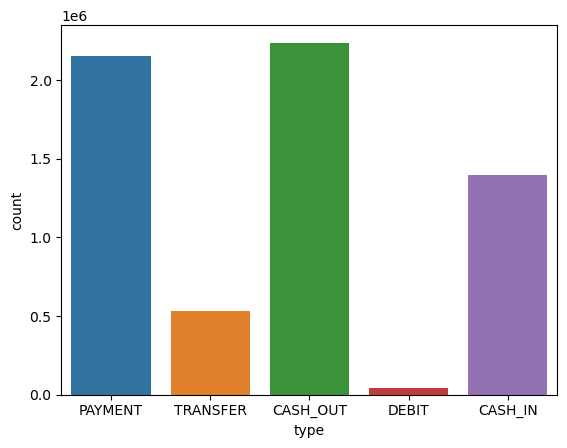

In [13]:
sns.countplot(x='type', data=data)

<Axes: xlabel='type', ylabel='amount'>

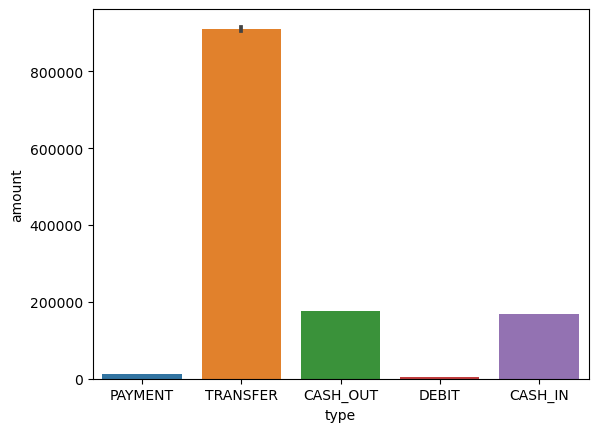

In [14]:
sns.barplot(x='type' , y='amount' , data=data)

In [15]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

<Axes: xlabel='isFraud', ylabel='count'>

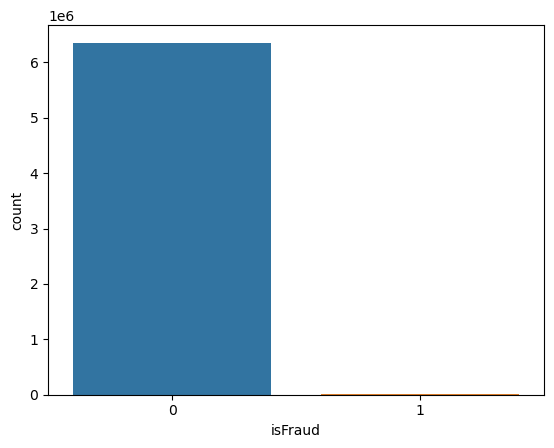

In [16]:
sns.countplot(x='isFraud',data=data)

In [18]:
from sklearn.utils import resample

majority = data[(data['isFraud']==0)] 
minority = data[(data['isFraud']==1)] 

n_samples = len(minority)

majority_downsampled = resample(majority,
                                replace=False, 
                                n_samples=n_samples,  
                                random_state=42)

data = pd.concat([majority_downsampled, minority])

In [19]:
data['isFraud'].value_counts()

isFraud
0    8213
1    8213
Name: count, dtype: int64

<Axes: xlabel='isFraud', ylabel='count'>

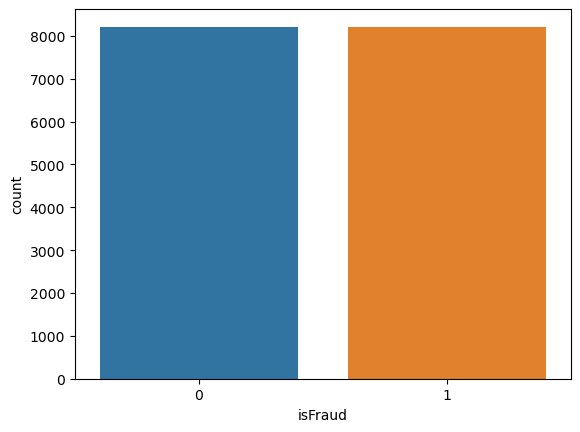

In [20]:
sns.countplot(x='isFraud',data=data)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16426 entries, 4105701 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   nameOrig        16426 non-null  object 
 4   oldbalanceOrg   16426 non-null  float64
 5   newbalanceOrig  16426 non-null  float64
 6   nameDest        16426 non-null  object 
 7   oldbalanceDest  16426 non-null  float64
 8   newbalanceDest  16426 non-null  float64
 9   isFraud         16426 non-null  int64  
 10  isFlaggedFraud  16426 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.5+ MB


<Axes: xlabel='step', ylabel='Count'>

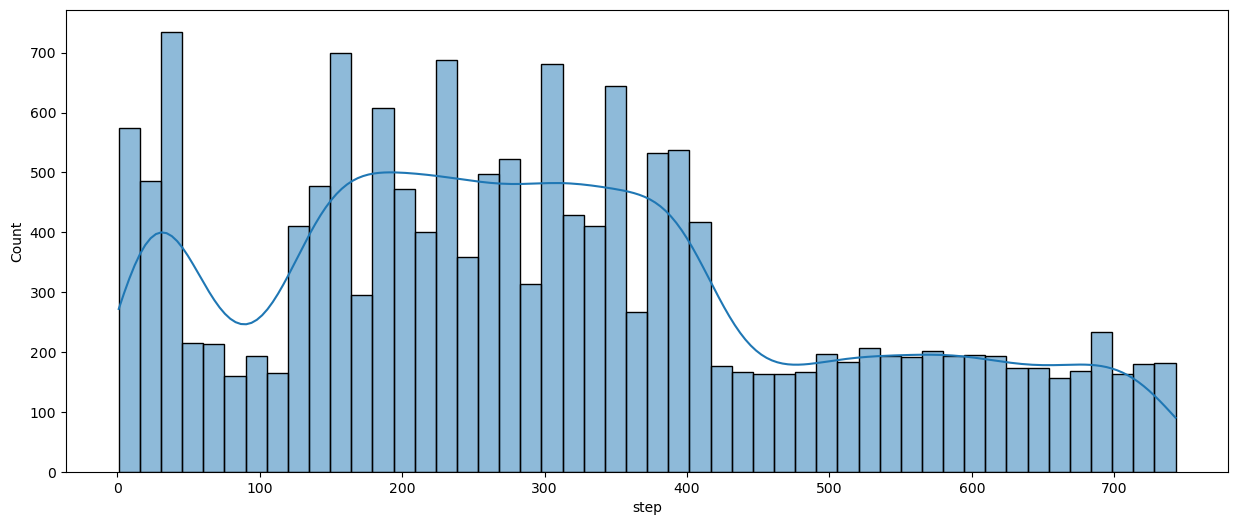

In [22]:
plt.figure(figsize=(15, 6))
sns.histplot(data['step'], bins=50, kde=True)


<Axes: >

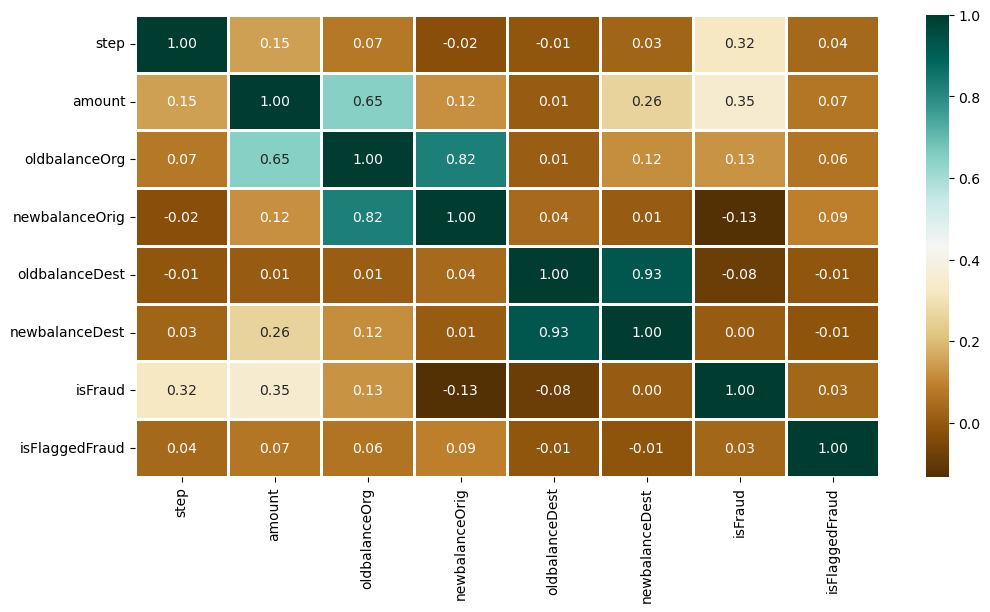

In [23]:
plt.figure(figsize=(12, 6))
numeric_data = data.select_dtypes(include='number')
sns.heatmap(numeric_data.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)


In [24]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4105701,302,TRANSFER,1117326.81,C1653827828,6053.00,0.00,C723898004,351084.09,1468410.90,0,0
6168896,563,CASH_IN,40687.98,C1799240188,47995.00,88682.98,C276105315,0.00,0.00,0,0
5065283,354,PAYMENT,20965.70,C2103943001,3157.00,0.00,M1364168600,0.00,0.00,0,0
2328,1,CASH_OUT,153596.45,C979532928,711133.71,557537.26,C1360767589,1954368.93,2107965.39,0,0
1855225,164,CASH_IN,69167.31,C1811581557,48601.00,117768.31,C882929863,0.00,0.00,0,0


In [25]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
4105701,302,TRANSFER,1117326.81,C1653827828,6053.00,0.00,C723898004,351084.09,1468410.90,0,0,False,False,False,True
6168896,563,CASH_IN,40687.98,C1799240188,47995.00,88682.98,C276105315,0.00,0.00,0,0,False,False,False,False
5065283,354,PAYMENT,20965.70,C2103943001,3157.00,0.00,M1364168600,0.00,0.00,0,0,False,False,True,False
2328,1,CASH_OUT,153596.45,C979532928,711133.71,557537.26,C1360767589,1954368.93,2107965.39,0,0,True,False,False,False
1855225,164,CASH_IN,69167.31,C1811581557,48601.00,117768.31,C882929863,0.00,0.00,0,0,False,False,False,False


In [26]:
x = data_new.drop(['isFraud','type','nameOrig','nameDest','isFlaggedFraud'],axis =1)
y=data_new['isFraud']

In [27]:
x.shape

(16426, 10)

In [28]:
y.shape

(16426,)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                    x, y, test_size=0.3, random_state=42)


In [30]:
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [31]:
# Logistic regression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

print(f'Model: Logistic Regression\n')

train_preds_logistic = logistic_model.predict_proba(X_train)[:, 1]
print('Training Accuracy:', ras(y_train, train_preds_logistic))

y_preds_logistic = logistic_model.predict_proba(X_test)[:, 1]
print('Validation Accuracy:', ras(y_test, y_preds_logistic))

Model: Logistic Regression

Training Accuracy: 0.9686713255991325
Validation Accuracy: 0.967357324597258


In [32]:
# Support Vector Classifier (SVC)
svc_model = SVC(kernel='rbf', probability=True)
svc_model.fit(X_train, y_train)

print(f'Model: Support Vector Classifier (SVC)\n')

train_preds_svc = svc_model.predict_proba(X_train)[:, 1]
print('Training Accuracy:', ras(y_train, train_preds_svc))

y_preds_svc = svc_model.predict_proba(X_test)[:, 1]
print('Validation Accuracy:', ras(y_test, y_preds_svc))

Model: Support Vector Classifier (SVC)

Training Accuracy: 0.9611657075767297
Validation Accuracy: 0.9598368228604146


In [33]:
# Random Forest Classifier

rf_model = RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)
rf_model.fit(X_train, y_train)

print(f'Model: Random Forest Classifier\n')

train_preds_rf = rf_model.predict_proba(X_train)[:, 1]
print('Training Accuracy:', ras(y_train, train_preds_rf))

y_preds_rf = rf_model.predict_proba(X_test)[:, 1]
print('Validation Accuracy:', ras(y_test, y_preds_rf))


Model: Random Forest Classifier

Training Accuracy: 0.9999959910169735
Validation Accuracy: 0.9975192186024509


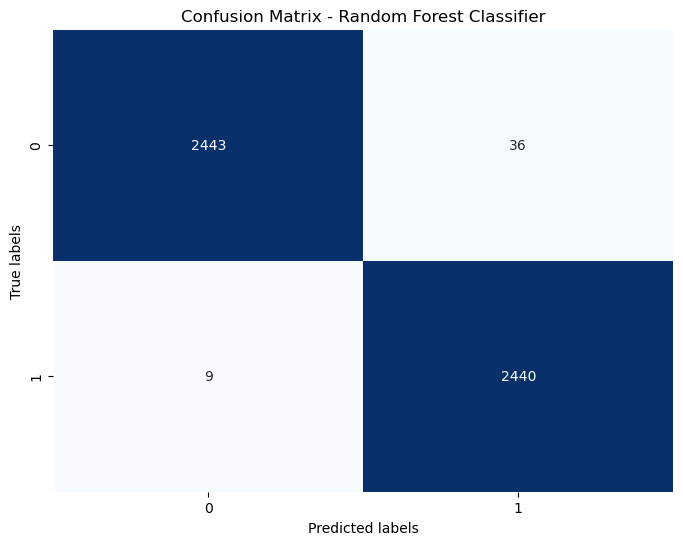

In [38]:
# Random Forest Classifier performed the best

# Confusion matrix

from sklearn.metrics import confusion_matrix

y_pred_rf = rf_model.predict(X_test)


conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


In [39]:
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2479
           1       0.99      1.00      0.99      2449

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928

